In [1]:
#Importando as bibliotecas
import cv2
import numpy as np

#image configs
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
%matplotlib inline

DATA_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w7 - Geometric Transformations and Image Features\data"

## 1 - Read Image

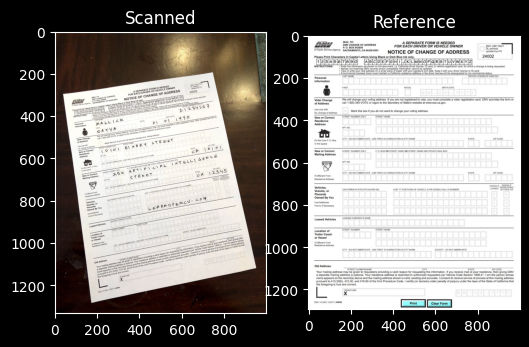

In [44]:
im1 = cv2.imread(DATA_PATH + "\\images\\scanned-form.jpg")
im2 = cv2.imread(DATA_PATH + "\\images\\form.jpg")

plt.subplot(121)
plt.title("Scanned")
plt.imshow(im1[:,:,::-1])

plt.subplot(122)
plt.title("Reference")
plt.imshow(im2[:,:,::-1])
plt.show()

## 2 - Detect Features

In [45]:
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15

In [46]:
img1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
img2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

In [47]:
ORB = cv2.ORB_create(MAX_FEATURES)
kp1, ds1 = ORB.detectAndCompute(img1Gray, None)
kp2, ds2 = ORB.detectAndCompute(img2Gray, None)

## 3-  Match Features

In [48]:
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(ds1, ds2, None)

matches  = sorted(matches, key = lambda x:x.distance, reverse=False)
nGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
matches = matches[:nGoodMatches]

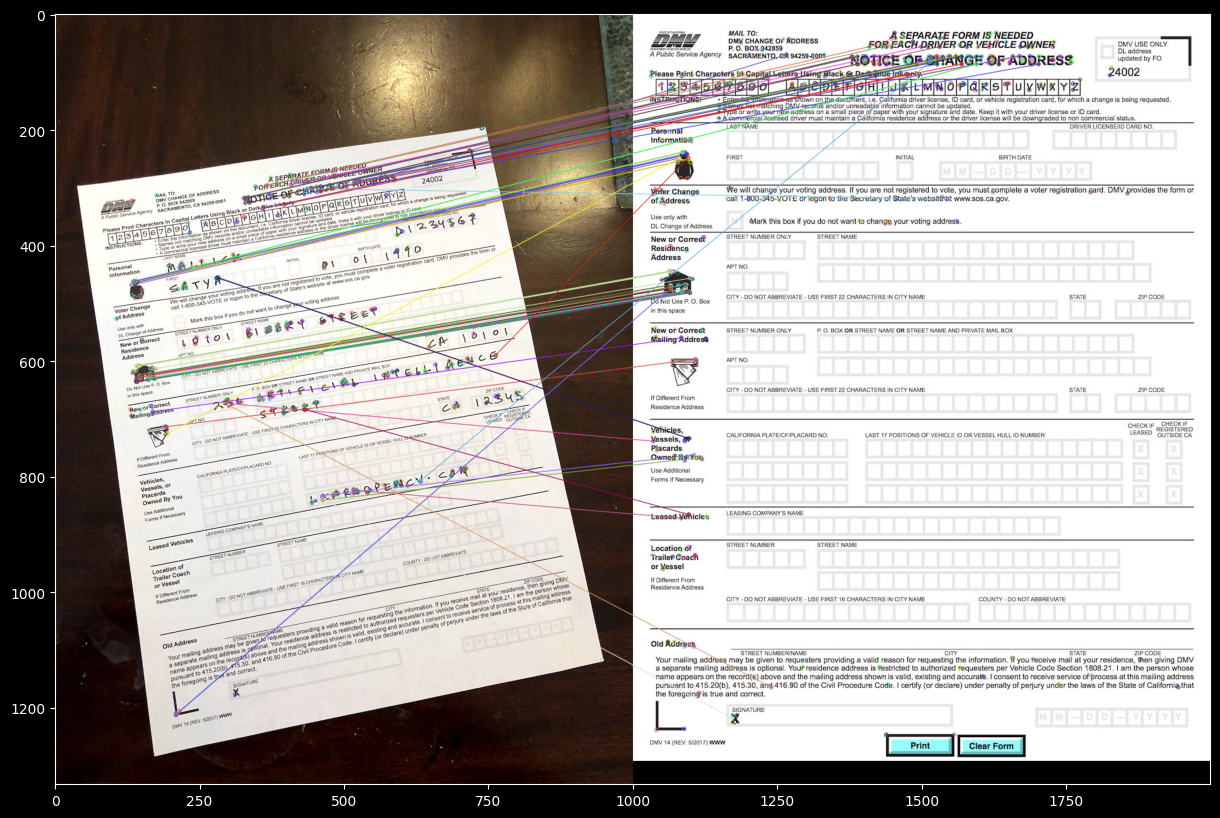

In [49]:
imMatches = cv2.drawMatches(im1, kp1, im2, kp2, matches, None)

plt.figure(figsize=(20,10))
plt.imshow(imMatches[:,:,::-1])
plt.show()

## 4 - Homography

In [50]:
points1 = np.zeros((len(matches), 2), dtype = np.float32)
points2 = np.zeros((len(matches), 2), dtype = np.float32)

In [59]:
for i, match in enumerate(matches):
    points2[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

## 5 - Warping Image

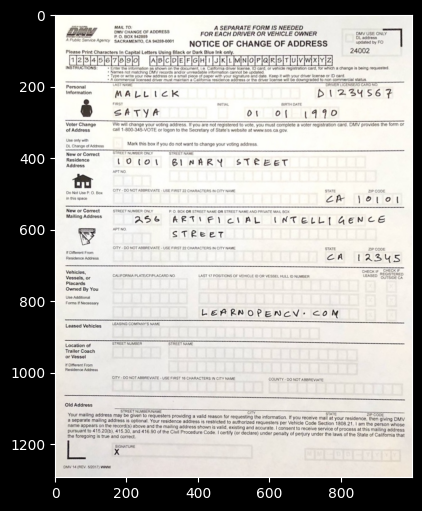

In [60]:
height, width, channels = im2.shape
img1Reg = cv2.warpPerspective(im1, h, (width, height))

plt.imshow(img1Reg[:,:,::-1])
plt.show()

In [61]:
print("Estimated homography : \n",  h)

Estimated homography : 
 [[ 1.39410158e+00 -2.00799432e-01 -8.38501433e+00]
 [ 2.21486061e-01  1.51141269e+00 -4.78696622e+02]
 [-6.63760728e-05  1.17767381e-04  1.00000000e+00]]


https://www.learnopencv.com/image-alignment-feature-based-using-opencv-c-python/
https://www.learnopencv.com/image-alignment-ecc-in-opencv-c-python/